# The Movie Database API Exploration

# Load Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import requests
from bs4 import BeautifulSoup
import datetime
import missingno as msno
import warnings

from config import API_Key

# Options and Settings

In [2]:
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.autolayout'] = True
plt.rcParams['figure.figsize'] = [12, 10]
plt.rcParams['font.size'] = 12
warnings.simplefilter('ignore')

# Fetch Data

In [3]:
# start page
PAGE = 1

url = f'https://api.themoviedb.org/3/movie/popular?api_key={API_Key}&language=en-US&page={PAGE}'

r = requests.get(url)

print(f"Status Code: {r.status_code} -- Content-Type: {r.headers['Content-Type']} -- Encoding: {r.encoding}")

Status Code: 200 -- Content-Type: application/json;charset=utf-8 -- Encoding: utf-8


In [4]:
# query first 250 pages
popular_movies = []

for PAGE in range(1, 251):
  url = url = f'https://api.themoviedb.org/3/movie/popular?api_key={API_Key}&language=en-US&page={PAGE}'
  r = requests.get(url)
  popular_movies.append(r.json())

In [5]:
page_number = []
adult = []
id = []
original_language = []
popularity = []
poster_path = []
release_date = []
title = []
vote_average = []
vote_count = []

for pg in popular_movies:
    pg_num = page_number.append(pg['page']) 
    adt = adult.append(pg['results'][0]['adult']) 
    ids = id.append(pg['results'][0]['id']) 
    orig_lang = original_language.append(pg['results'][0]['original_language']) 
    pop = popularity.append(pg['results'][0]['popularity']) 
    post_path = poster_path.append(pg['results'][0]['poster_path']) 
    rel_date = release_date.append(pg['results'][0]['release_date']) 
    tit = title.append(pg['results'][0]['title']) 
    vot_avg = vote_average.append(pg['results'][0]['vote_average']) 
    vot_cnt = vote_count.append(pg['results'][0]['vote_count'])

In [6]:
data = {
  'page_number': page_number,
  'adult': adult,
  'id': id,
  'original_language': original_language,
  'popularity': popularity,
  'poster_path': poster_path,
  'release_date': release_date,
  'title': title,
  'vote_average': vote_average,
  'vote_count': vote_count
}

df = pd.DataFrame(data=data)
df.head()

,page_number,adult,id,original_language,popularity,poster_path,release_date,title,vote_average,vote_count
0,1,False,453395,en,5462.157,/9Gtg2DzBhmYamXBS1hKAhiwbBKS.jpg,2022-05-04,Doctor Strange in the Multiverse of Madness,7.5,2698
1,2,False,825808,en,1089.150,/qk1ZERG6yhwAJqTobmDgw8jRL2C.jpg,2022-01-07,See for Me,6.3,62
2,3,False,897424,en,658.642,/q1ngkvPCnOYKeyNZjg8QqvaSnuZ.jpg,2022-05-09,Dark Cloud,6.7,26
3,4,False,928270,en,606.591,/AeeXeyiiPOyybnjSnJoSTixOZQq.jpg,2022-01-17,Heatwave,7.4,30
4,5,False,860623,en,376.600,/4B7liCxNCZIZGONmAMkCnxVlZQV.jpg,2021-10-19,Last Man Down,6.3,487


In [7]:
df.drop(columns=['page_number', 'adult'], inplace=True)         # drop page number and adult columns
df.head()

,id,original_language,popularity,poster_path,release_date,title,vote_average,vote_count
0,453395,en,5462.157,/9Gtg2DzBhmYamXBS1hKAhiwbBKS.jpg,2022-05-04,Doctor Strange in the Multiverse of Madness,7.5,2698
1,825808,en,1089.150,/qk1ZERG6yhwAJqTobmDgw8jRL2C.jpg,2022-01-07,See for Me,6.3,62
2,897424,en,658.642,/q1ngkvPCnOYKeyNZjg8QqvaSnuZ.jpg,2022-05-09,Dark Cloud,6.7,26
3,928270,en,606.591,/AeeXeyiiPOyybnjSnJoSTixOZQq.jpg,2022-01-17,Heatwave,7.4,30
4,860623,en,376.600,/4B7liCxNCZIZGONmAMkCnxVlZQV.jpg,2021-10-19,Last Man Down,6.3,487


In [8]:
df.shape

(250, 8)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 250 non-null    int64  
 1   original_language  250 non-null    object 
 2   popularity         250 non-null    float64
 3   poster_path        249 non-null    object 
 4   release_date       250 non-null    object 
 5   title              250 non-null    object 
 6   vote_average       250 non-null    float64
 7   vote_count         250 non-null    int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 15.8+ KB


In [10]:
df['id'] = df['id'].astype('category')                  # convert id to categorical            
df['id'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 250 entries, 0 to 249
Series name: id
Non-Null Count  Dtype   
--------------  -----   
250 non-null    category
dtypes: category(1)
memory usage: 10.7 KB


In [11]:
pd.value_counts(df.dtypes)

object      4
float64     2
category    1
int64       1
dtype: int64

In [12]:
df['id'] = df['id'].astype('category')                        # convert id to categorical            
df['id'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 250 entries, 0 to 249
Series name: id
Non-Null Count  Dtype   
--------------  -----   
250 non-null    category
dtypes: category(1)
memory usage: 10.7 KB


In [13]:
df.describe(exclude='number')

,id,original_language,poster_path,release_date,title
count,250,250,249,250,250
unique,250,16,249,242,250
top,13,en,/9Gtg2DzBhmYamXBS1hKAhiwbBKS.jpg,2021-07-23,Doctor Strange in the Multiverse of Madness
freq,1,181,1,3,1


In [14]:
df['release_date'] = pd.to_datetime(df['release_date'])       # convert release date to datetime
df.dtypes

id                         category
original_language            object
popularity                  float64
poster_path                  object
release_date         datetime64[ns]
title                        object
vote_average                float64
vote_count                    int64
dtype: object

In [15]:
df['year'] = df['release_date'].dt.year                       # extract year
df['month'] = df['release_date'].dt.month                     # extract month
df['day'] = df['release_date'].dt.day                         # extract day
df['day_name'] = df['release_date'].dt.day_name()             # extract day name
df['week'] = df['release_date'].dt.week                       # extract week
df['quarter']= df['release_date'].dt.quarter                  # extract quarter

df.head()

,id,original_language,popularity,poster_path,release_date,title,vote_average,vote_count,year,month,day,day_name,week,quarter
0,453395,en,5462.157,/9Gtg2DzBhmYamXBS1hKAhiwbBKS.jpg,2022-05-04,Doctor Strange in the Multiverse of Madness,7.5,2698,2022.0,5.0,4.0,Wednesday,18.0,2.0
1,825808,en,1089.150,/qk1ZERG6yhwAJqTobmDgw8jRL2C.jpg,2022-01-07,See for Me,6.3,62,2022.0,1.0,7.0,Friday,1.0,1.0
2,897424,en,658.642,/q1ngkvPCnOYKeyNZjg8QqvaSnuZ.jpg,2022-05-09,Dark Cloud,6.7,26,2022.0,5.0,9.0,Monday,19.0,2.0
3,928270,en,606.591,/AeeXeyiiPOyybnjSnJoSTixOZQq.jpg,2022-01-17,Heatwave,7.4,30,2022.0,1.0,17.0,Monday,3.0,1.0
4,860623,en,376.600,/4B7liCxNCZIZGONmAMkCnxVlZQV.jpg,2021-10-19,Last Man Down,6.3,487,2021.0,10.0,19.0,Tuesday,42.0,4.0


In [16]:
df.query("release_date == 'NaT'")                                # query movies without release date 

,id,original_language,popularity,poster_path,release_date,title,vote_average,vote_count,year,month,day,day_name,week,quarter
104,615129,en,31.589,/knr2XAbotEtc2X2diStLvv4ovPX.jpg,NaT,Pokémon Detective Pikachu 2,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN
141,931285,en,28.346,/pB14E8HMkfCTIavw3Zwodk1nHAt.jpg,NaT,Mortal Kombat 2,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
df_dropna = df[~df['release_date'].isna()]                       # drop movies without release date
df_dropna.head()

,id,original_language,popularity,poster_path,release_date,title,vote_average,vote_count,year,month,day,day_name,week,quarter
0,453395,en,5462.157,/9Gtg2DzBhmYamXBS1hKAhiwbBKS.jpg,2022-05-04,Doctor Strange in the Multiverse of Madness,7.5,2698,2022.0,5.0,4.0,Wednesday,18.0,2.0
1,825808,en,1089.150,/qk1ZERG6yhwAJqTobmDgw8jRL2C.jpg,2022-01-07,See for Me,6.3,62,2022.0,1.0,7.0,Friday,1.0,1.0
2,897424,en,658.642,/q1ngkvPCnOYKeyNZjg8QqvaSnuZ.jpg,2022-05-09,Dark Cloud,6.7,26,2022.0,5.0,9.0,Monday,19.0,2.0
3,928270,en,606.591,/AeeXeyiiPOyybnjSnJoSTixOZQq.jpg,2022-01-17,Heatwave,7.4,30,2022.0,1.0,17.0,Monday,3.0,1.0
4,860623,en,376.600,/4B7liCxNCZIZGONmAMkCnxVlZQV.jpg,2021-10-19,Last Man Down,6.3,487,2021.0,10.0,19.0,Tuesday,42.0,4.0


In [18]:
 # convert date information to integer
df_dropna[['year', 'month', 'day', 'week', 'quarter']] = df_dropna[['year', 'month', 'day', 'week', 'quarter']].applymap(lambda x: int(x))  
df_dropna.head()

,id,original_language,popularity,poster_path,release_date,title,vote_average,vote_count,year,month,day,day_name,week,quarter
0,453395,en,5462.157,/9Gtg2DzBhmYamXBS1hKAhiwbBKS.jpg,2022-05-04,Doctor Strange in the Multiverse of Madness,7.5,2698,2022,5,4,Wednesday,18,2
1,825808,en,1089.150,/qk1ZERG6yhwAJqTobmDgw8jRL2C.jpg,2022-01-07,See for Me,6.3,62,2022,1,7,Friday,1,1
2,897424,en,658.642,/q1ngkvPCnOYKeyNZjg8QqvaSnuZ.jpg,2022-05-09,Dark Cloud,6.7,26,2022,5,9,Monday,19,2
3,928270,en,606.591,/AeeXeyiiPOyybnjSnJoSTixOZQq.jpg,2022-01-17,Heatwave,7.4,30,2022,1,17,Monday,3,1
4,860623,en,376.600,/4B7liCxNCZIZGONmAMkCnxVlZQV.jpg,2021-10-19,Last Man Down,6.3,487,2021,10,19,Tuesday,42,4


In [19]:
df_dropna['day_name'].unique()

array(['Wednesday', 'Friday', 'Monday', 'Tuesday', 'Thursday', 'Saturday',
       'Sunday'], dtype=object)

In [20]:
# change day_name to categorical 
ordered_day_name = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

df_dropna['day_name'] = pd.Categorical(df_dropna['day_name'], ordered_day_name)

df_dropna['day_name'].dtype

CategoricalDtype(categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
                  'Saturday', 'Sunday'],
, ordered=False)

In [21]:
df_dropna[['popularity', 'vote_average', 'vote_count']].describe()

,popularity,vote_average,vote_count
count,248.000000,248.000000,248.000000
mean,79.532290,6.388306,2074.737903
std,356.977317,1.421575,3578.389431
min,13.374000,0.000000,0.000000
25%,21.589750,6.100000,147.000000
50%,30.911500,6.600000,626.500000
75%,55.894500,7.200000,2381.000000
max,5462.157000,8.500000,23319.000000


In [22]:
# helper function to plot distributions
def plotkde(data, x):
  '''
  arguments

  data: dataframe
  x: column name

  '''
  return sns.kdeplot(data=data, x=x)

<AxesSubplot:xlabel='popularity', ylabel='Density'>

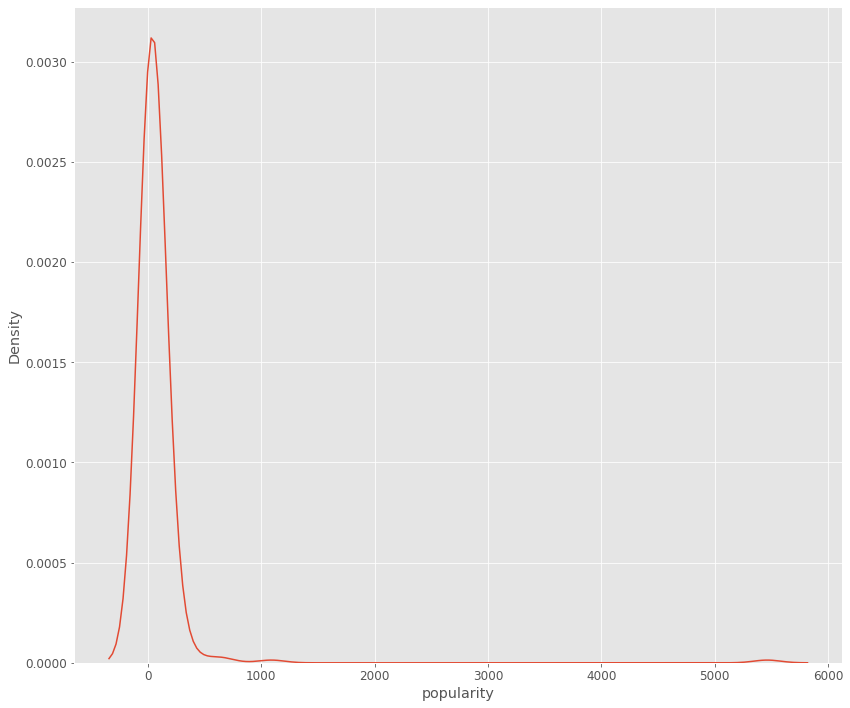

In [23]:
plotkde(data=df_dropna, x='popularity')

<AxesSubplot:xlabel='vote_average', ylabel='Density'>

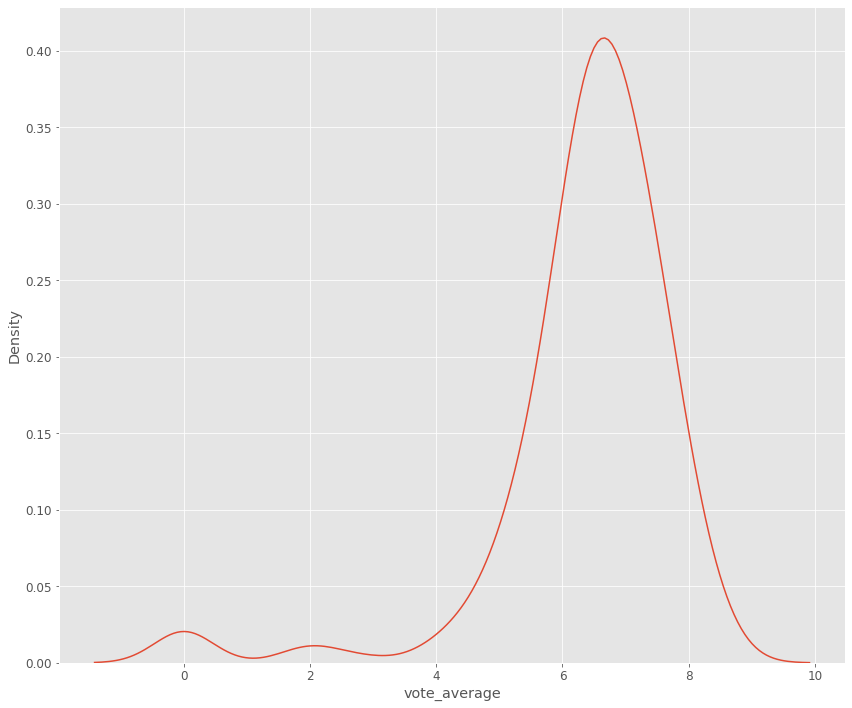

In [24]:
plotkde(data=df_dropna, x='vote_average')

<AxesSubplot:xlabel='vote_count', ylabel='Density'>

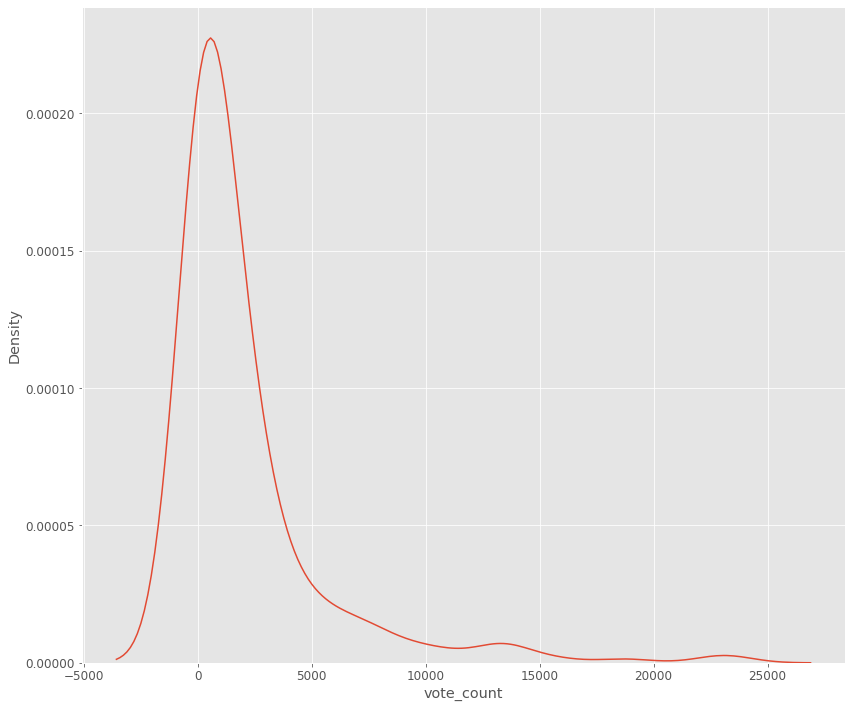

In [25]:
plotkde(data=df_dropna, x='vote_count')

# Missing Values Exploration

In [26]:
df_dropna.isna().sum()

id                   0
original_language    0
popularity           0
poster_path          1
release_date         0
title                0
vote_average         0
vote_count           0
year                 0
month                0
day                  0
day_name             0
week                 0
quarter              0
dtype: int64

In [27]:
df_dropna.loc[df_dropna['poster_path'].isna()]

,id,original_language,popularity,poster_path,release_date,title,vote_average,vote_count,year,month,day,day_name,week,quarter
64,677430,en,44.951,None,1975-01-01,Los 7 pecados capitales,6.1,10,1975,1,1,Wednesday,1,1


In [28]:
df1 = df_dropna.loc[~df_dropna['poster_path'].isna()]
df1.isna().sum()

id                   0
original_language    0
popularity           0
poster_path          0
release_date         0
title                0
vote_average         0
vote_count           0
year                 0
month                0
day                  0
day_name             0
week                 0
quarter              0
dtype: int64

<AxesSubplot:>

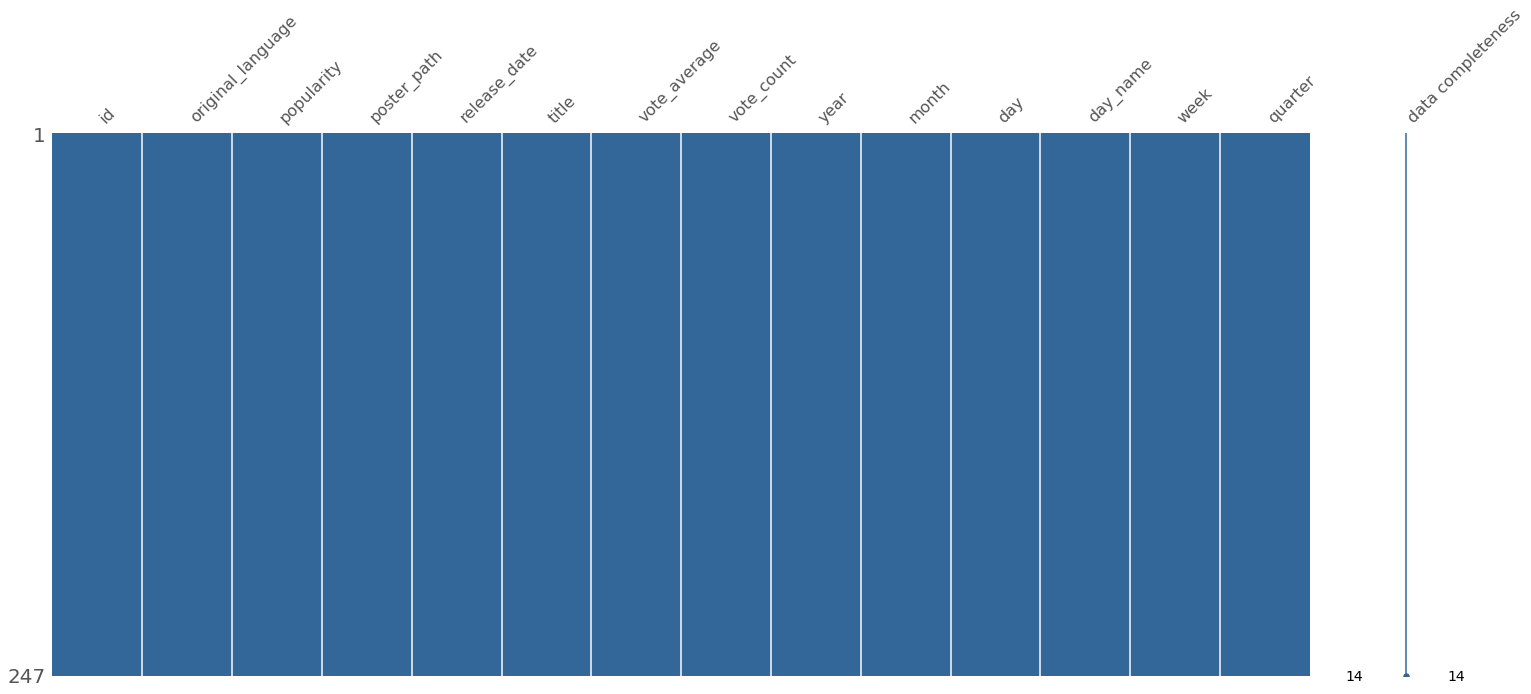

In [29]:
msno.matrix(df1, labels=True, sort='descending', color=(0.2, 0.4, 0.6))

In [30]:
df1.duplicated().sum()                                   # check for duplicates

0

In [31]:
df1.loc[df1.duplicated(subset=['id'])]                    # check where id is duplicated

,id,original_language,popularity,poster_path,release_date,title,vote_average,vote_count,year,month,day,day_name,week,quarter


[Text(0.5, 1.0, 'Count of unique original language')]

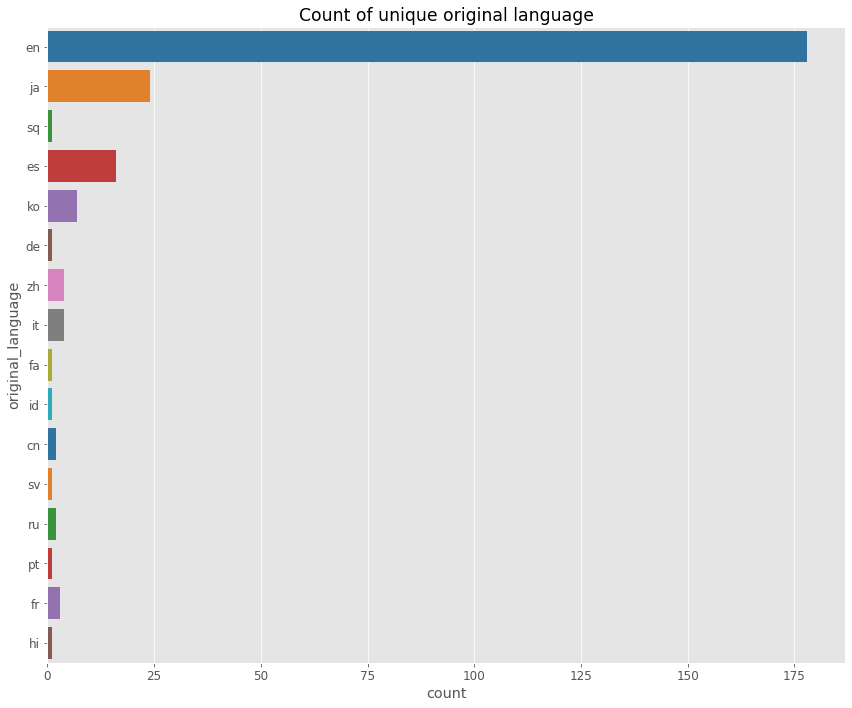

In [32]:
ax = sns.countplot(
  data=df1, 
  y='original_language', palette='tab10',
)

ax.set(title='Count of unique original language')

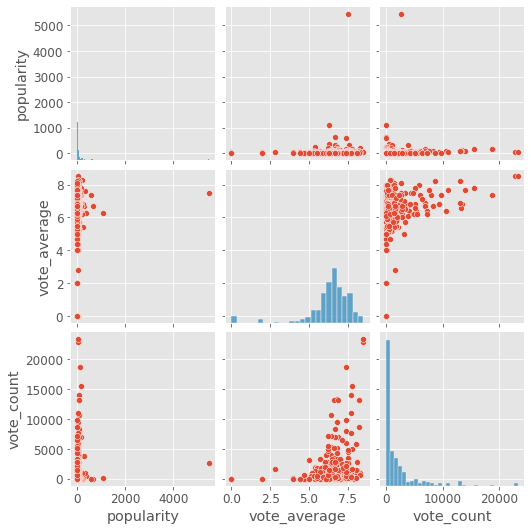

In [33]:
sns.pairplot(df1[['popularity', 'vote_average', 'vote_count']])

In [34]:
df_corr = df1[['popularity', 'vote_average', 'vote_count']].corr()     # compute pairwise correlation
df_corr

,popularity,vote_average,vote_count
popularity,1.000000,0.072700,0.025692
vote_average,0.072700,1.000000,0.266669
vote_count,0.025692,0.266669,1.000000


<AxesSubplot:>

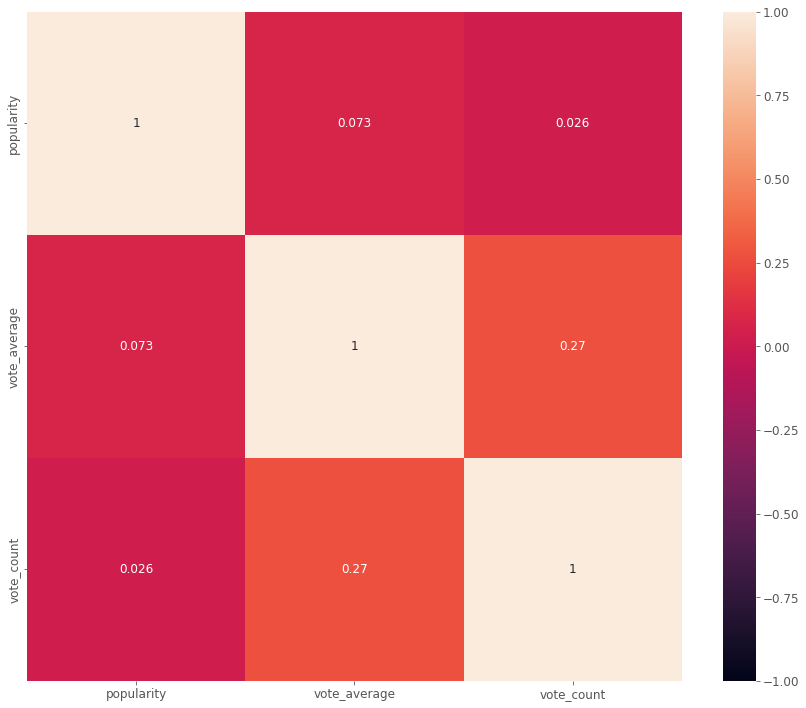

In [35]:
sns.heatmap(df_corr, annot=True, vmin=-1, vmax=1)

In [36]:
from matplotlib.ticker import FuncFormatter

# helper function to format y-axis
def thousand(x, pos):
  return '%1.1fK' % (x * 1e-3)

format_tsd = FuncFormatter(thousand)


def original(x, pos):
  return '%1.1f' % (x * 1)

format_orig = FuncFormatter(original)


# bar plot helper function
def plot_bar(data, x, y, hue=None, palette=None, title=None, xlabel=None, ylabel=None, formatter=None):
    # create figure and axis
    fig, ax = plt.subplots()
    fig.autofmt_xdate()

    # plot bar chart
    sns.barplot(
        data=data, 
        x=x, y=y, 
        ci=None, hue=hue, palette=palette,
        ax=ax)

    # label plot axes
    ax.set(title=title, xlabel=xlabel, ylabel=ylabel)

    # set y-axis formatter
    ax.xaxis.set_major_formatter(formatter=formatter)

    return plot_bar

# Top 20 Movies by Popularity 

<function __main__.plot_bar(data, x, y, hue=None, palette=None, title=None, xlabel=None, ylabel=None, formatter=None)>

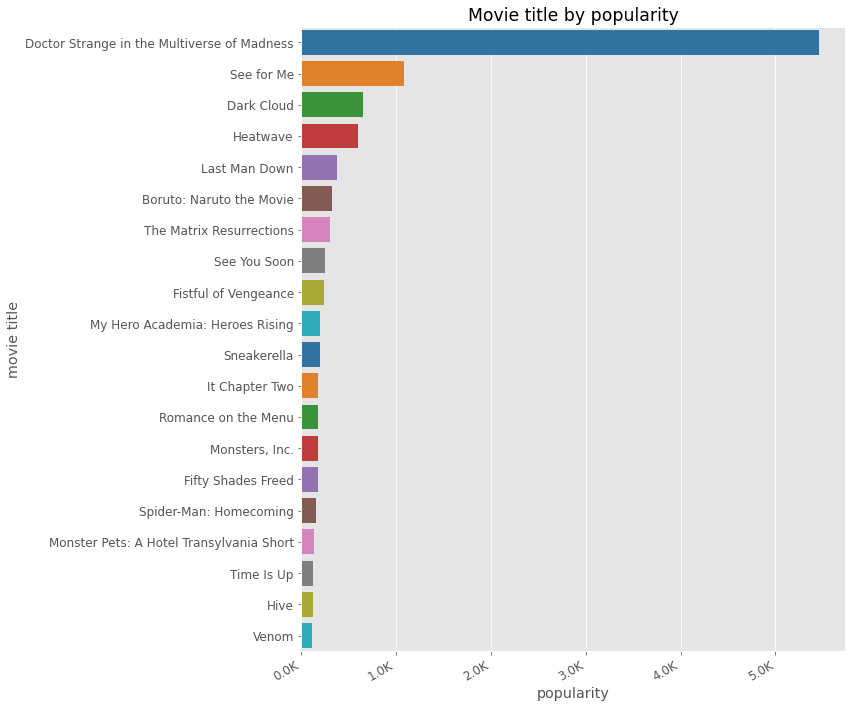

In [37]:
plot_bar(
  data=df1.sort_values(by='popularity', ascending=False).head(20),
  x='popularity', y='title', 
  palette='tab10',
  title='Movie title by popularity', xlabel='popularity', ylabel='movie title',
  formatter=format_tsd
)

# Top 20 Movies by Vote Count

<function __main__.plot_bar(data, x, y, hue=None, palette=None, title=None, xlabel=None, ylabel=None, formatter=None)>

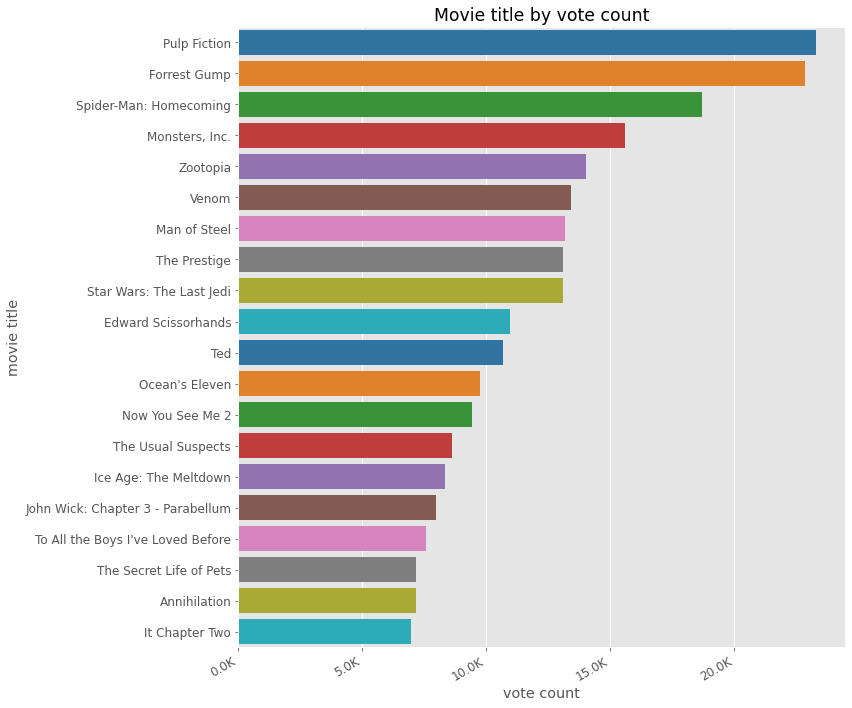

In [38]:
plot_bar(
  data=df1.sort_values(by='vote_count', ascending=False).head(20),
  x='vote_count', y='title', 
  palette='tab10',
  title='Movie title by vote count', xlabel='vote count', ylabel='movie title',
  formatter=format_tsd
)

# Top 20 Movies by Vote Average

<function __main__.plot_bar(data, x, y, hue=None, palette=None, title=None, xlabel=None, ylabel=None, formatter=None)>

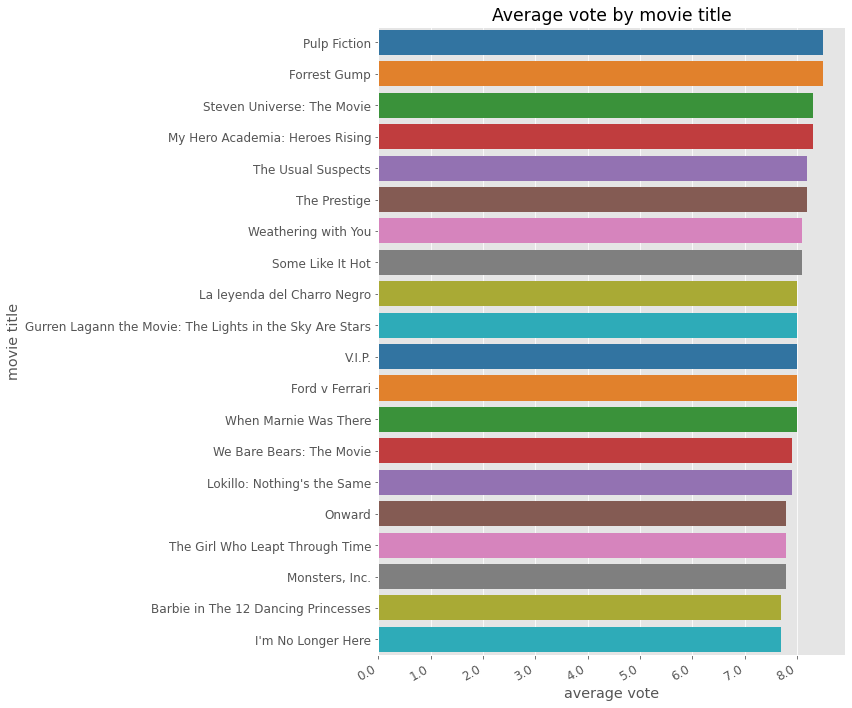

In [39]:
plot_bar(
  data=df1.sort_values(by='vote_average', ascending=False).head(20),
  x='vote_average', y='title', 
  palette='tab10',
  title='Average vote by movie title', xlabel='average vote', ylabel='movie title',
  formatter=format_orig
)

# Movie Popularity Exploration

[Text(0.5, 1.0, 'Movie popularity by day name'),
 Text(0.5, 0, 'day name'),
 Text(0, 0.5, 'popularity')]

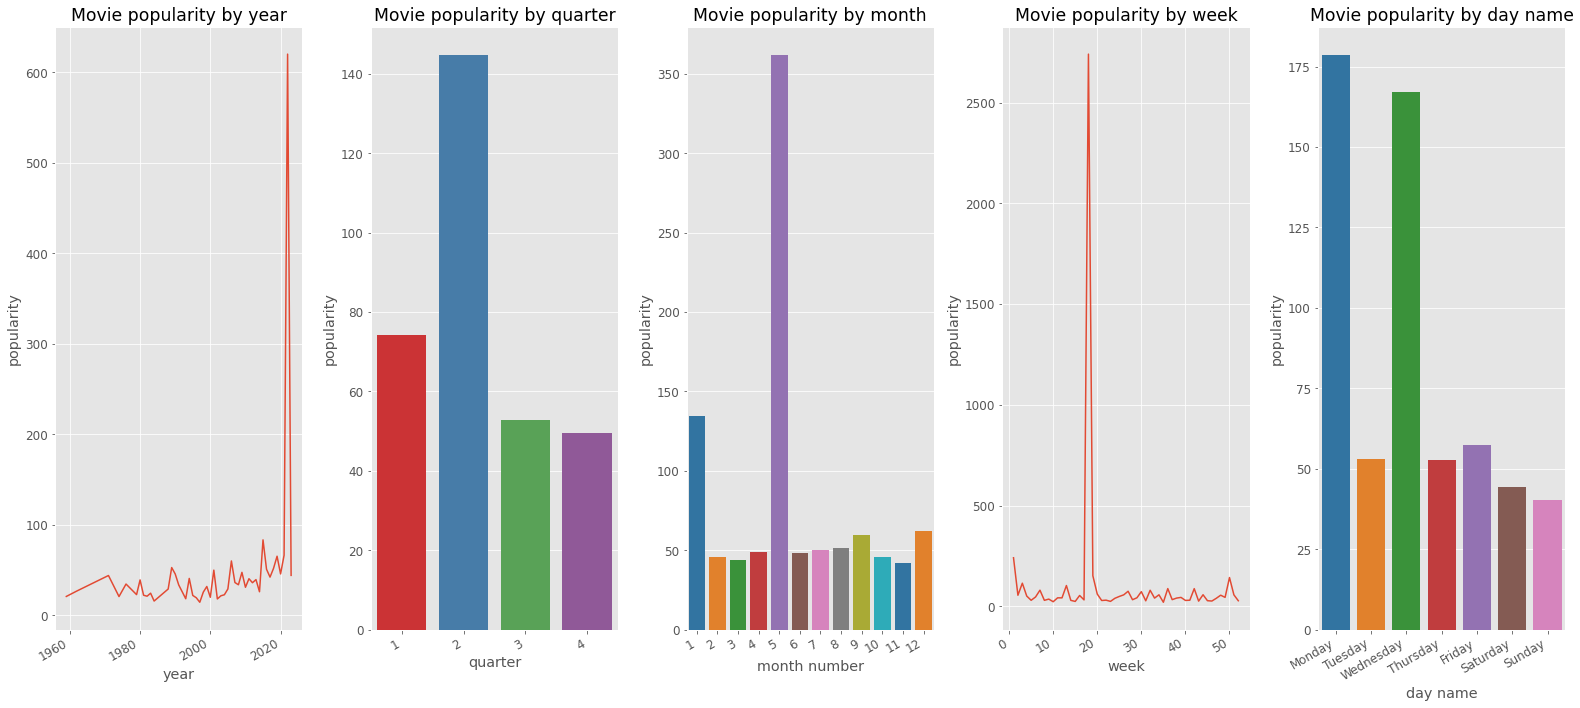

In [40]:
# create figure and axis
fig, (axs1, axs2, axs3, axs4, axs5) = plt.subplots(1, 5, figsize=(22, 10))
fig.autofmt_xdate()

# plot popularity by year
sns.lineplot(data=df1, x='year', y='popularity', ci=None, ax=axs1)
axs1.set(title='Movie popularity by year', xlabel='year', ylabel='popularity')

# plot popularity by quarter
sns.barplot(data=df1, x='quarter', y='popularity', ci=None, ax=axs2, palette='Set1')
axs2.set(title='Movie popularity by quarter', xlabel='quarter', ylabel='popularity')

# plot popularity by month
sns.barplot(data=df1, x='month', y='popularity', ci=None, ax=axs3, palette='tab10')
axs3.set(title='Movie popularity by month', xlabel='month number', ylabel='popularity')

# plot popularity by week
sns.lineplot(data=df1, x='week', y='popularity', ci=None, ax=axs4)
axs4.set(title='Movie popularity by week', xlabel='week', ylabel='popularity')

# plot popularity by name of the day
sns.barplot(data=df1, x='day_name', y='popularity', ci=None, palette='tab10', ax=axs5)
axs5.set(title='Movie popularity by day name', xlabel='day name', ylabel='popularity')